<a href="https://colab.research.google.com/github/jordavy/DataScienceProjects/blob/main/ProyectoAnalitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Analisis exploratorio**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

import os

import librosa
import librosa.display

import seaborn as sns
sns.set_style('whitegrid')

import math

import warnings
warnings.filterwarnings("ignore")

import IPython

import sklearn

import cv2
import glob


from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split #dudas

import os
import cv2

from sklearn.preprocessing import StandardScaler

import random
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

In [ ]:
#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

import warnings #eliminar warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Para el proyecto se utilizo la siguiente base de datos  https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

La cual contiene 100 canciones por cada genero músical, tiene un arcivo csv con con las caracteristicas principales de cada audo  de 30 segundos, también  cuenta con otro csv  con las mismas caracteristicas, pero esta vez para cada  3 segundos  de cada audio. en total tiene 10  generos.

In [ ]:
# Monta tu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Analisis exploratorio

In [ ]:
seed = 42
np.random.seed(seed)

path = "/content/drive/MyDrive/Proyecto_Analitica/Data"

path_audio_files = path + "/genres_original/"
hop_length = 512

n_fft = 2048

genre_dict = {"blues":0,"classical":1,"country":2,"disco":3,"hiphop":4,"jazz":5,"metal":6,"pop":7,"reggae":8,"rock":9}

In [ ]:
'''
#Audio de la primera pista de cada genero músical.
for genre in genre_dict.keys():
    print(genre)

    # Reading the first audio file
    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")

    display(IPython.display.Audio(data, rate = sampling_rate))'''

'\n#Audio de la primera pista de cada genero músical.\nfor genre in genre_dict.keys():\n    print(genre)\n    \n    # Reading the first audio file\n    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")\n    \n    display(IPython.display.Audio(data, rate = sampling_rate))'

In [ ]:
'''#Visualización de la forma de la onda de los primeros archivos de audio de cada género músical.
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
i = 0
j = 0
for genre in genre_dict.keys():

    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")
    librosa.display.waveshow(y = data, sr = sampling_rate, color = "#A300F9",ax=axes[i][j])


    axes[i][j].set_title(genre)

    if(j == 1):
        i = i + 1
        j = 0
    else:
        j = j + 1
print(data.data)

plt.tight_layout()
plt.show()'''

'#Visualización de la forma de la onda de los primeros archivos de audio de cada género músical.\nfig, axes= plt.subplots(nrows=5, ncols=2, figsize=(15, 20))\ni = 0\nj = 0\nfor genre in genre_dict.keys():\n    \n    data,sampling_rate = librosa.load(path_audio_files + genre + "/" + genre + ".00000.wav")\n    librosa.display.waveshow(y = data, sr = sampling_rate, color = "#A300F9",ax=axes[i][j])\n \n\n    axes[i][j].set_title(genre)\n\n    if(j == 1):\n        i = i + 1\n        j = 0\n    else:\n        j = j + 1\nprint(data.data)\n\nplt.tight_layout()\nplt.show()'

In [ ]:
#leemos el csv que contiene las caracteristicas principales de cada audio con su respectivaa etiqueta.
Xdata = pd.read_csv('/content/drive/MyDrive/Proyecto_Analitica/Data/features_3_sec.csv')

# Mezclar las filas del DataFrame
Xdata = Xdata.sample(frac=1, random_state=42).reset_index(drop=True)
df = pd.DataFrame(Xdata)
Xdata

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,hiphop.00002.8.wav,66149,0.404232,0.096884,0.090223,0.000638,1416.001997,4.652689e+05,1973.083395,185535.919214,...,55.957241,-4.883339,53.092667,1.034924,20.556194,-4.238788,31.233484,-2.934530,34.166332,hiphop
1,jazz.00042.0.wav,66149,0.243589,0.084304,0.090146,0.000930,1206.214018,4.888347e+04,1523.543854,24788.400357,...,25.465181,-4.751444,25.725513,-8.050362,18.618586,-9.862431,53.661839,-11.109019,12.743995,jazz
2,blues.00048.7.wav,66149,0.355097,0.086465,0.130576,0.001197,2293.981066,1.842980e+05,2181.331825,108973.121405,...,65.851204,-4.983762,28.220079,-4.208559,46.466846,-8.962951,47.620399,-3.131865,34.480564,blues
3,blues.00003.9.wav,66149,0.387297,0.092417,0.149871,0.005382,1061.389626,1.284824e+05,1665.487663,123692.389644,...,61.515476,-7.273301,54.165520,0.735078,30.324575,-2.341069,49.825420,-6.121044,18.358120,blues
4,metal.00080.3.wav,66149,0.419387,0.079487,0.153464,0.001511,2739.278464,8.171741e+04,2410.267381,12507.457839,...,28.295105,-3.922399,25.422867,3.707712,34.378510,-9.237077,65.149940,1.359221,57.023216,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,jazz.00074.2.wav,66149,0.267750,0.095907,0.097862,0.003840,2383.639867,4.895087e+05,2562.185167,362534.742879,...,31.795132,-4.608271,35.679741,-4.374666,25.779526,-3.147118,31.087011,-6.567071,63.435112,jazz
9986,jazz.00019.9.wav,66149,0.248258,0.081754,0.041260,0.000109,1393.173520,5.375639e+04,1860.369053,40230.018073,...,45.488049,-3.965447,14.019684,1.638268,16.482351,1.450863,30.808023,15.290517,134.934906,jazz
9987,jazz.00039.8.wav,66149,0.240019,0.093735,0.083758,0.002298,1204.024837,1.078589e+05,1388.025813,24365.151773,...,77.487785,2.630663,42.383427,1.302412,55.033031,1.615667,48.945679,2.049629,95.770294,jazz
9988,blues.00086.0.wav,66149,0.365543,0.092261,0.108228,0.002294,1511.812830,1.268170e+06,1781.554997,279045.135831,...,72.863556,-8.287215,133.220337,0.265637,41.878937,-4.613067,66.480179,-1.747772,27.914318,blues


In [ ]:
# Codificar las etiquetas a valores numéricos
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(Xdata['label'])

In [ ]:
XdataCorrelacion = Xdata.drop(['filename', 'label'], axis=1)
XdataCorrelacion['label'] = y_labels
#Matriz de correlación de Pearson
corr_matrix = XdataCorrelacion.iloc[:, 1:].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
chroma_stft_mean,1.000000,-0.443757,0.424706,0.243647,0.534670,0.251985,0.464617,0.100909,0.526881,0.138394,0.457080,0.278017,0.034305,0.216488,-0.109303,0.417177,0.019084,0.573974,0.054769,-0.513978,0.055816,0.013981,0.121196,0.213522,0.135822,0.069027,0.090913,0.342903,0.121105,0.112848,0.101439,0.423220,0.032791,0.155357,-0.016019,0.376734,-0.067534,0.108459,-0.147130,0.400529,-0.226017,-0.036171,-0.242423,0.297993,-0.265843,-0.078784,-0.270092,0.228293,-0.264815,-0.103968,-0.273841,0.168254,-0.308342,-0.062985,-0.313233,0.193666,-0.363354,0.330370
chroma_stft_var,-0.443757,1.000000,-0.078410,0.251900,-0.208136,0.276964,-0.031197,0.291007,-0.141792,0.330930,-0.391281,0.138214,-0.010949,0.024139,0.072719,0.000478,-0.004419,-0.296517,0.347460,0.091757,0.326217,0.323529,0.354501,-0.194552,0.333186,0.248247,0.351826,-0.155817,0.363150,0.192922,0.343599,-0.239743,0.352686,0.126653,0.363827,-0.216207,0.337400,0.149261,0.335556,-0.263772,0.302924,0.209318,0.309993,-0.197412,0.283260,0.162830,0.285569,-0.221620,0.296099,0.111544,0.303262,-0.171744,0.295359,0.107008,0.277295,-0.173398,0.287195,-0.079683
rms_mean,0.424706,-0.078410,1.000000,0.553770,0.470781,0.241796,0.495142,0.085760,0.500178,0.157281,0.293745,0.217606,0.065134,0.884846,-0.012401,0.766446,0.015668,0.795000,-0.080320,-0.453606,0.033635,0.136936,0.069158,-0.034473,0.178296,0.122941,0.119419,0.072916,0.212010,0.181207,0.140892,0.134868,0.126329,0.213195,0.087181,0.144650,0.070977,0.133593,-0.012006,0.134779,-0.064247,0.043769,-0.088406,0.113960,-0.080352,0.012184,-0.088842,0.055563,-0.032953,-0.013952,-0.041470,0.087615,-0.046180,0.024552,-0.062662,0.082251,-0.103519,0.205471
rms_var,0.243647,0.251900,0.553770,1.000000,0.327809,0.509235,0.383329,0.285950,0.350716,0.377474,0.143768,0.453957,0.071193,0.519717,0.100449,0.744850,-0.020418,0.296198,0.336492,-0.351508,0.355515,0.277005,0.376544,-0.215820,0.412464,0.248711,0.359285,-0.134974,0.479166,0.290245,0.356301,-0.110396,0.381793,0.301416,0.332587,-0.058046,0.297938,0.251421,0.227644,-0.066374,0.164785,0.214514,0.161973,-0.026530,0.130442,0.189566,0.116201,-0.064570,0.159390,0.144238,0.144163,-0.004785,0.102019,0.136798,0.095054,0.015085,0.073571,0.101467
spectral_centroid_mean,0.534670,-0.208136,0.470781,0.327809,1.000000,0.476959,0.890382,0.021120,0.974360,0.172380,0.865487,0.579997,0.050559,0.274194,-0.004654,0.531487,0.002111,0.686196,-0.061331,-0.931435,0.085022,0.195977,0.042125,-0.165793,0.187926,0.078506,0.027291,-0.027122,0.209412,0.196388,0.106182,0.088172,0.118458,0.260035,0.057883,0.146238,0.054746,0.144027,-0.009416,0.118541,-0.064614,0.058537,-0.055983,0.118186,-0.058378,0.035098,-0.064673,0.116866,-0.025006,0.026879,-0.018358,0.177934,-0.006376,0.018651,-0.011018,0.191512,-0.051205,0.360175
spectral_centroid_var,0.251985,0.276964,0.241796,0.509235,0.476959,1.000000,0.556491,0.614254,0.492965,0.780308,0.242913,0.818348,0.047028,0.192711,0.089544,0.388760,-0.009407,0.159586,0.429485,-0.497158,0.748612,0.513633,0.461658,-0.297699,0.488902,0.406538,0.390078,-0.158945,0.493938,0.391931,0.403324,-0.158683,0.405858,0.374794,0.357289,-0.135941,0.326240,0.309186,0.244125,-0.139430,0.160181,0.282591,0.166777,-0.113106,0.111909,0.234941,0.096053,-0.134131,0.125906,0.134869,0.115752,-0.045517,0.093684,0.12385

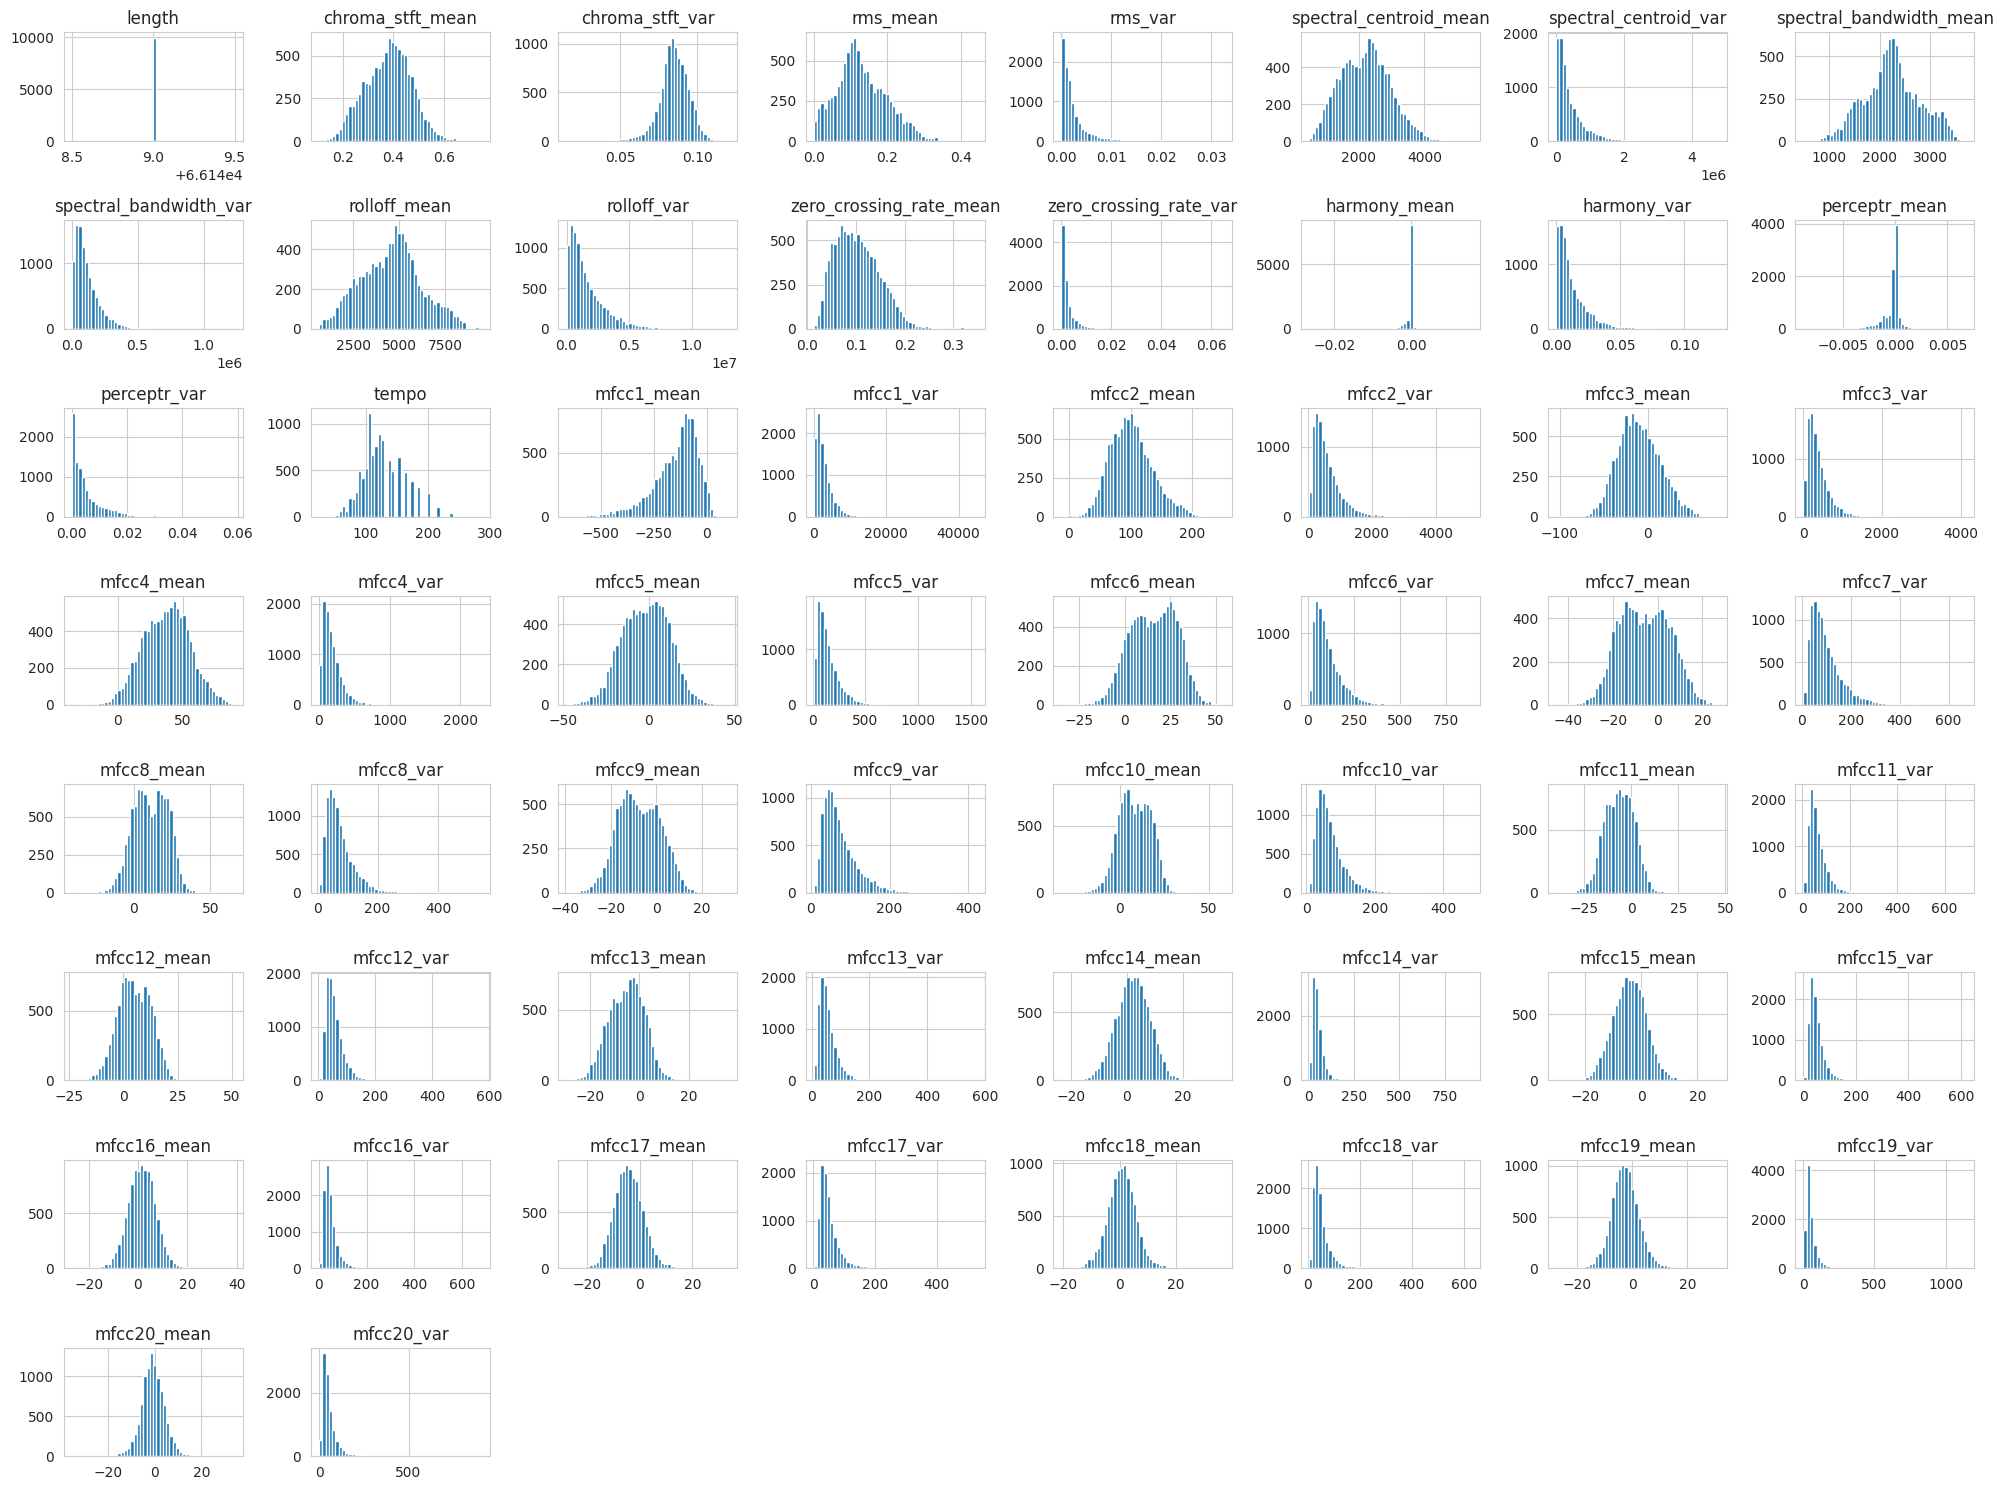

In [ ]:
#histogramas de las caracteristicas principales de los audios
Xdata.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

Text(0, 0.5, 'BPM')

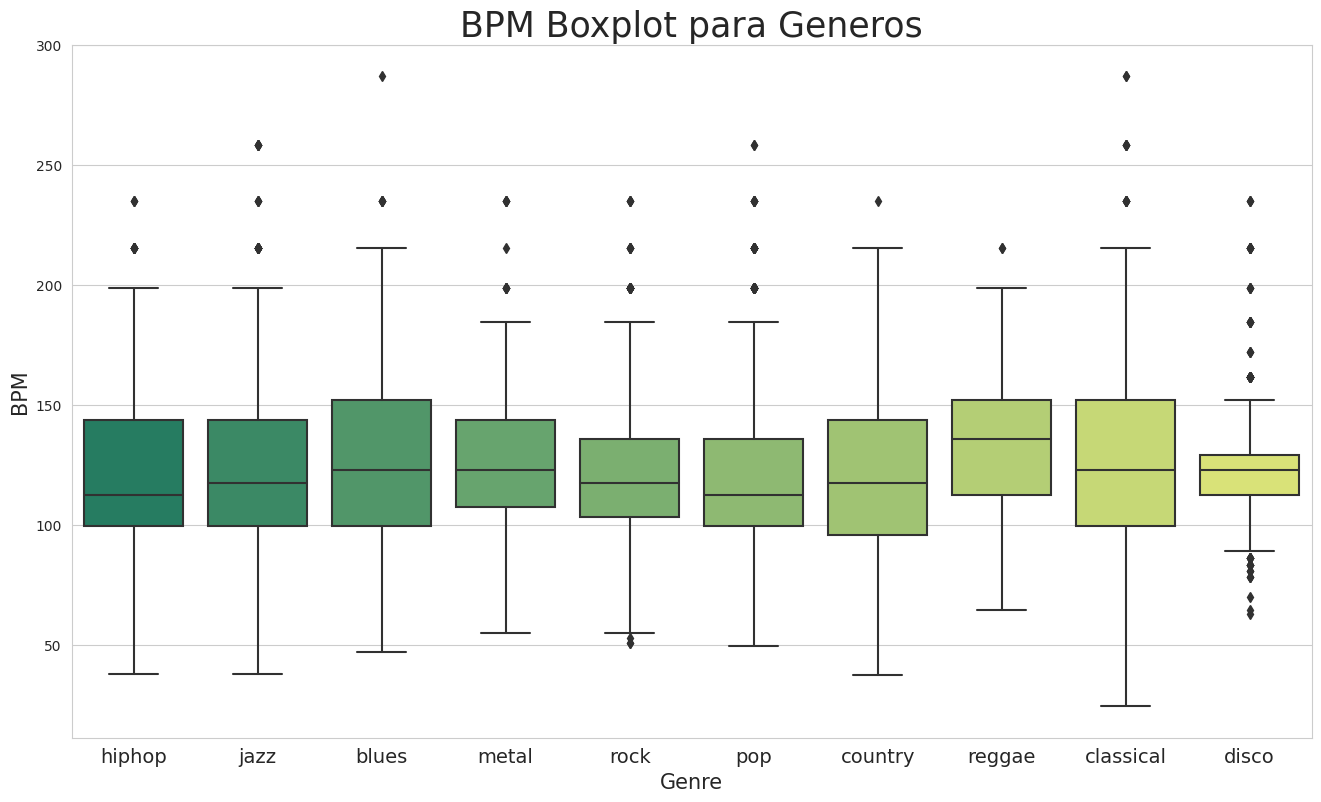

In [ ]:
#boxplot de la distribucion del tempo para cada genero
x = Xdata[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'summer');

plt.title('BPM Boxplot para Generos', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

#Segunda parte

In [ ]:
Xdata

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,hiphop.00002.8.wav,66149,0.404232,0.096884,0.090223,0.000638,1416.001997,4.652689e+05,1973.083395,185535.919214,...,55.957241,-4.883339,53.092667,1.034924,20.556194,-4.238788,31.233484,-2.934530,34.166332,hiphop
1,jazz.00042.0.wav,66149,0.243589,0.084304,0.090146,0.000930,1206.214018,4.888347e+04,1523.543854,24788.400357,...,25.465181,-4.751444,25.725513,-8.050362,18.618586,-9.862431,53.661839,-11.109019,12.743995,jazz
2,blues.00048.7.wav,66149,0.355097,0.086465,0.130576,0.001197,2293.981066,1.842980e+05,2181.331825,108973.121405,...,65.851204,-4.983762,28.220079,-4.208559,46.466846,-8.962951,47.620399,-3.131865,34.480564,blues
3,blues.00003.9.wav,66149,0.387297,0.092417,0.149871,0.005382,1061.389626,1.284824e+05,1665.487663,123692.389644,...,61.515476,-7.273301,54.165520,0.735078,30.324575,-2.341069,49.825420,-6.121044,18.358120,blues
4,metal.00080.3.wav,66149,0.419387,0.079487,0.153464,0.001511,2739.278464,8.171741e+04,2410.267381,12507.457839,...,28.295105,-3.922399,25.422867,3.707712,34.378510,-9.237077,65.149940,1.359221,57.023216,metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,jazz.00074.2.wav,66149,0.267750,0.095907,0.097862,0.003840,2383.639867,4.895087e+05,2562.185167,362534.742879,...,31.795132,-4.608271,35.679741,-4.374666,25.779526,-3.147118,31.087011,-6.567071,63.435112,jazz
9986,jazz.00019.9.wav,66149,0.248258,0.081754,0.041260,0.000109,1393.173520,5.375639e+04,1860.369053,40230.018073,...,45.488049,-3.965447,14.019684,1.638268,16.482351,1.450863,30.808023,15.290517,134.934906,jazz
9987,jazz.00039.8.wav,66149,0.240019,0.093735,0.083758,0.002298,1204.024837,1.078589e+05,1388.025813,24365.151773,...,77.487785,2.630663,42.383427,1.302412,55.033031,1.615667,48.945679,2.049629,95.770294,jazz
9988,blues.00086.0.wav,66149,0.365543,0.092261,0.108228,0.002294,1511.812830,1.268170e+06,1781.554997,279045.135831,...,72.863556,-8.287215,133.220337,0.265637,41.878937,-4.613067,66.480179,-1.747772,27.914318,blues


In [ ]:
df = Xdata.iloc[:, 1:] #se quita la columna filename
y = df['label']
X = df.loc[:, df.columns != 'label'] #se quita la etiqueta de interes

cols = X.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

# se  hace un PCA (Analisis de componenestes principales, tomando 2 componentes principales

pca = PCA(n_components=2)
scaled_df = pca.fit_transform(np_scaled)
df_p = pd.DataFrame(data = scaled_df, columns = ['pca1', 'pca2'])

fd_PCA = pd.concat([df_p, y_train], axis = 1)

pca.explained_variance_ratio_#varianza de las dos componentes  principales

array([0.26745621, 0.18238003])

Text(0, 0.5, 'Componente principal 2')

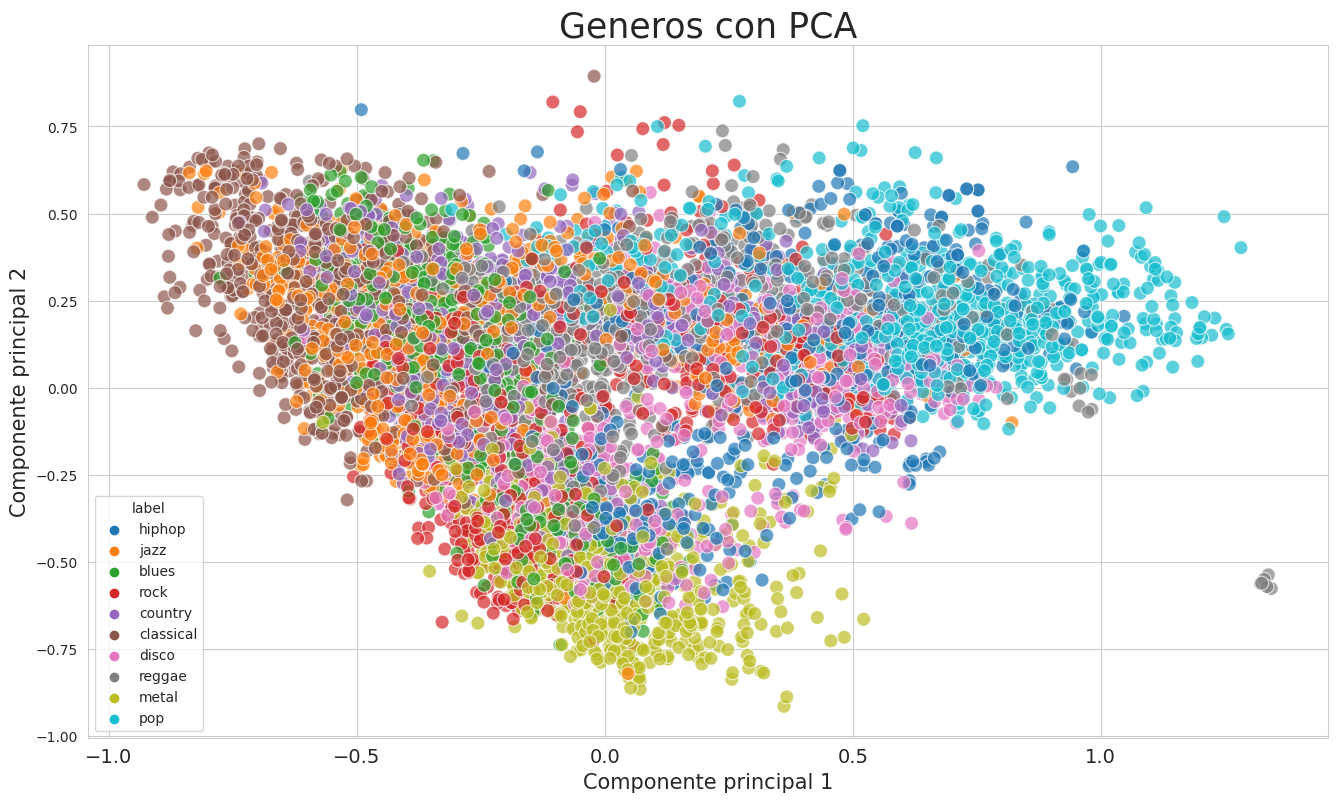

In [ ]:
#grafica de los generos  con las dos componentes principales
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pca1", y = "pca2", data = fd_PCA, hue = "label", alpha = 0.7,
               s = 100);

plt.title('Generos con PCA', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Componente principal 1", fontsize = 15)
plt.ylabel("Componente principal 2", fontsize = 15)

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.4498362440131941

In [ ]:
df = Xdata.iloc[:, 1:] #se quita la columna filename
y = df['label']
X = df.loc[:, df.columns != 'label'] #se quita la etiqueta de interes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=123)
print(X_train.shape,y_train.shape)

(7992, 58) (7992,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#Función para evaluar modelos
def model_assess(model, title="Default"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print('Accuracy ', title, ':', round(accuracy_score(y_test, y_pred), 5), '\n')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
model_assess(knn, "KNN")

[[185   1   3   1   0   4   0   0   3   0]
 [  1 179   2   0   0  10   1   0   0   0]
 [  6   4 158   4   1   3   0   2   8   1]
 [  2   2   7 188   5   1   0   1   1   4]
 [  1   0   5   7 196   1   3   0   4   0]
 [  6  13   7   1   0 164   0   0   0   1]
 [  1   0   0   2   1   0 203   0   0   4]
 [  1   1   6  10   4   2   0 164   2   1]
 [  2   1   3   4   2   1   0   1 191   0]
 [  8   2   6  10   2   0   1   1   2 162]]
Accuracy  KNN : 0.8959 



In [ ]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=42)
model_assess(rforest, "Random Forest")

[[175   1   6   3   2   3   5   0   2   0]
 [  0 189   0   0   0   4   0   0   0   0]
 [ 16   1 152   3   0  10   1   0   3   1]
 [  1   5   7 172   1   3   4   5   6   7]
 [  2   1   3   1 191   0   4   6   6   3]
 [  4  12   4   1   0 171   0   0   0   0]
 [  1   0   0   0   0   0 203   0   1   6]
 [  0   0   1   6   2   0   0 176   2   4]
 [  2   1   8   3   3   4   0  13 170   1]
 [  2   2  10   5   0   7   7   1   4 156]]
Accuracy  Random Forest : 0.87838 



In [ ]:
l_regression = LogisticRegression(multi_class="auto",solver="lbfgs", max_iter=100, random_state=42)
model_assess(l_regression, "Logistic Regression")

sgd = SGDClassifier(max_iter=100,random_state=42)
model_assess(sgd, "Gradient Descent")

[[141   0  18   5   2  10   9   0   3   9]
 [  0 185   1   1   0   6   0   0   0   0]
 [ 18   0 111   9   3   8   1   4  10  23]
 [  5   3  11 125   7   4   4  15  14  23]
 [ 13   1   5   2 147   0   6  11  28   4]
 [  5  11   6   0   1 164   0   2   0   3]
 [  5   0   1   6   0   2 178   0   1  18]
 [  0   0  10   9   6   0   0 158   3   5]
 [  9   0   9  11  26   5   0  10 125  10]
 [ 21   5  18  16   4   8   7   9   7  99]]
Accuracy  Logistic Regression : 0.71722 

[[128   0   7   3   2  10   5   0  11  31]
 [  1 184   2   0   0   3   0   0   1   2]
 [ 15   0 100   8   3   4   0   1  23  33]
 [  9   2  15 100   4   4   3  13  18  43]
 [ 12   0   6  10 116   2   5  10  50   6]
 [ 11  15   9   1   0 127   0   4  12  13]
 [  3   0   2   1   0   2 157   0   1  45]
 [  0   0   4  10   1   2   2 157  10   5]
 [ 10   0   9  15  13   3   0  10 140   5]
 [ 18   2  15  13   4  10   2  10  15 105]]
Accuracy  Gradient Descent : 0.65766 



In [ ]:
pipeline_KNN = Pipeline([
        ("std_sca", StandardScaler()),
        ("KNN",KNeighborsClassifier(n_neighbors=3))
    ])

pipeline_KNN.fit(X_train, y_train)
pipeline_KNN.predict(X_test)

array(['rock', 'classical', 'blues', ..., 'metal', 'reggae', 'classical'],
      dtype=object)

In [ ]:
pipeline_RForest = Pipeline([
        ("std_sca", StandardScaler()),
        ("Random Forest",RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=42))
    ])

pipeline_RForest.fit(X_train, y_train)
pipeline_RForest.predict(X_test)

array(['metal', 'classical', 'blues', ..., 'metal', 'pop', 'classical'],
      dtype=object)

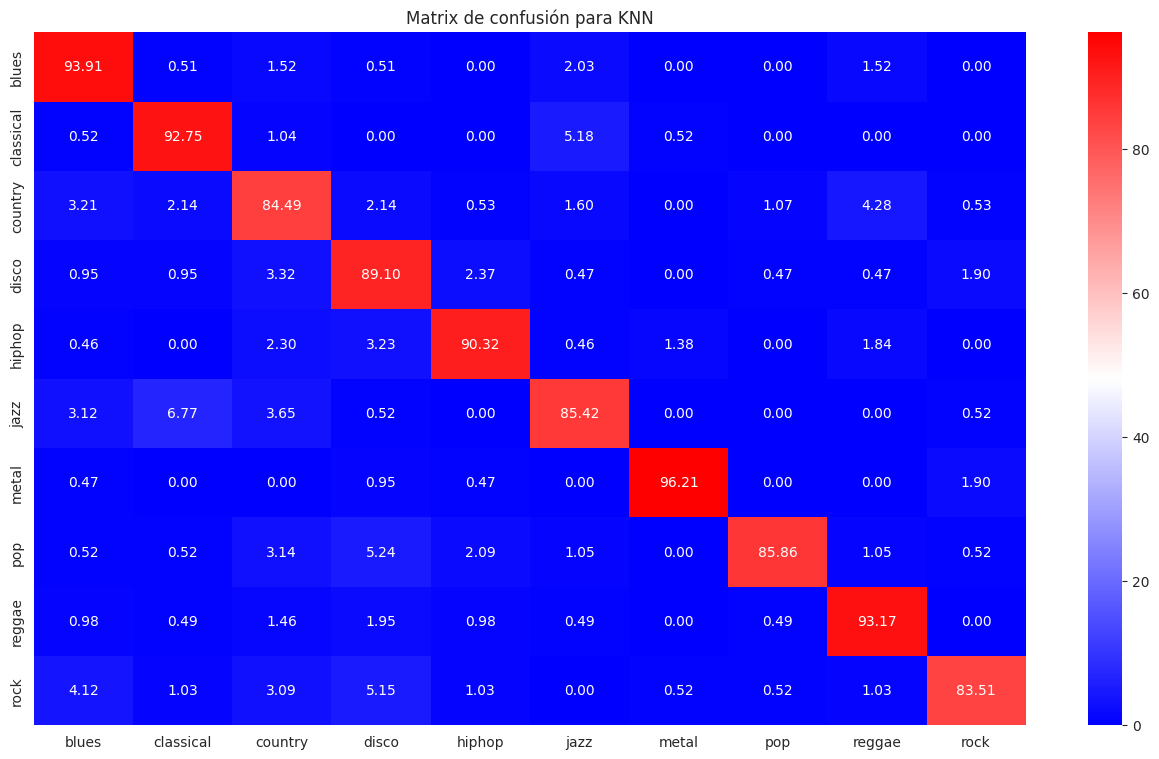

In [ ]:
y_pred_KNN = pipeline_KNN.predict(X_test)
# Obtener la matriz de confusión
conf = confusion_matrix(y_test, y_pred_KNN)

# Calcular el número total de muestras en cada clase
class_totals = conf.sum(axis=1)

# Calcular la matriz de confusión en forma de porcentaje
conf_percentage = conf / class_totals[:, np.newaxis] * 100

# Crear la figura y el mapa de calor
plt.figure(figsize=(16, 9))
sns.heatmap(conf_percentage, cmap="bwr", annot=True, fmt=".2f",
            xticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
            yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
plt.title("Matrix de confusión para KNN")
# Mostrar la figura
plt.show()


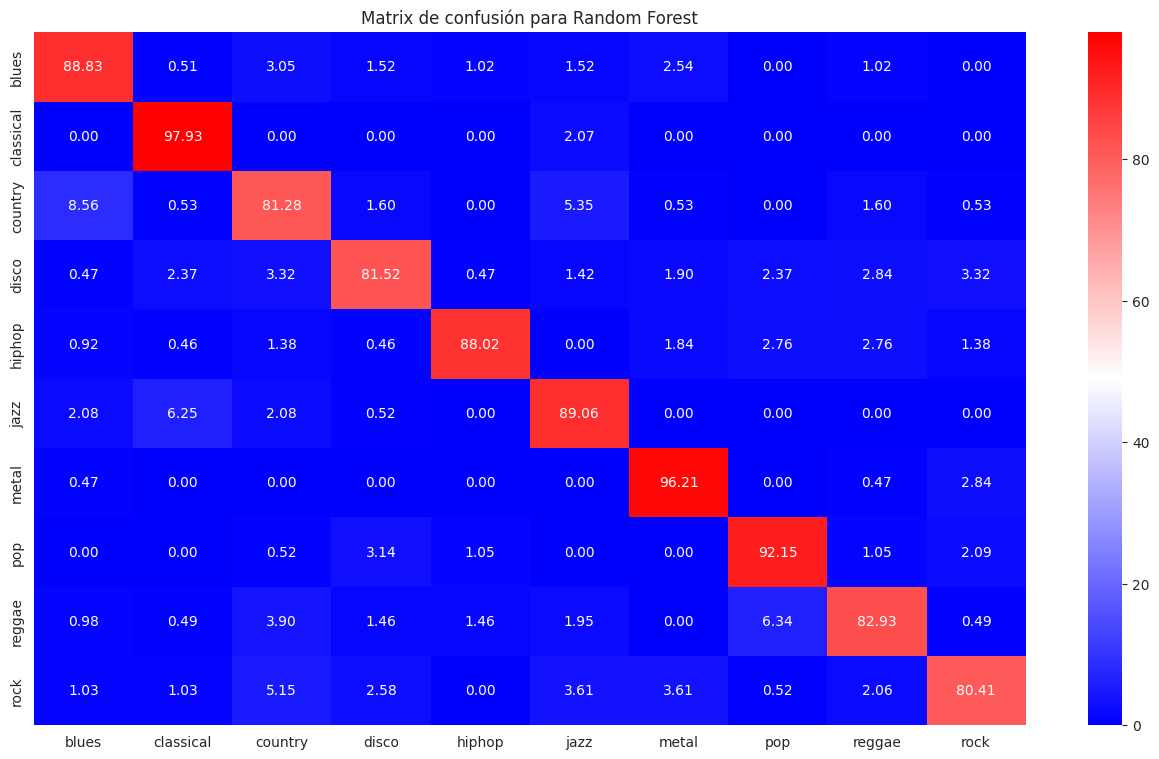

In [ ]:
y_pred_RF = pipeline_RForest.predict(X_test)
# Obtener la matriz de confusión
conf = confusion_matrix(y_test, y_pred_RF)

# Calcular el número total de muestras en cada clase
class_totals = conf.sum(axis=1)

# Calcular la matriz de confusión en forma de porcentaje
conf_percentage = conf / class_totals[:, np.newaxis] * 100

# Crear la figura y el mapa de calor
plt.figure(figsize=(16, 9))
sns.heatmap(conf_percentage, cmap="bwr", annot=True, fmt=".2f",
            xticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
            yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
plt.title("Matrix de confusión para Random Forest")
# Mostrar la figura
plt.show()


In [ ]:
y_pred  = list(pipeline_KNN.predict(X_test[:20]))
print(pd.DataFrame(y_pred,y_test[:20]))

                   0
label               
rock            rock
classical  classical
blues          blues
reggae        reggae
metal          metal
hiphop        hiphop
jazz            rock
blues          blues
blues          blues
pop              pop
rock            rock
metal          metal
metal          metal
rock            rock
disco          disco
jazz         country
blues          blues
hiphop        hiphop
classical  classical
classical  classical


In [ ]:
y_pred  = list(pipeline_RForest.predict(X_test[:20]))
print(pd.DataFrame(y_pred,y_test[:20]))

                   0
label               
rock           metal
classical  classical
blues          blues
reggae        reggae
metal          metal
hiphop        hiphop
jazz       classical
blues          blues
blues          blues
pop              pop
rock            rock
metal          metal
metal          metal
rock            rock
disco          disco
jazz         country
blues          metal
hiphop        hiphop
classical  classical
classical  classical


# Codigo para extraer caracteristicas de los audios

In [ ]:
def extract_audio_features(audio_path):
    # Cargar el archivo de audio y extraer características
    y, sr = librosa.load('/content/drive/MyDrive/Proyecto_Analitica/'+ audio_path + '.wav', duration=30.0)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    harmonic = librosa.effects.harmonic(y)
    # ... otras características que desees extraer ...

    # Crear un diccionario con los nombres de las columnas y los valores de las características
    data = {
        'length': [len(y)],
        'chroma_stft_mean': [chroma_stft.mean()],
        'chroma_stft_var': [chroma_stft.var()],
        'rms_mean': [rms.mean()],
        'rms_var': [rms.var()],
        'spectral_centroid_mean': [spectral_centroid.mean()],
        'spectral_centroid_var': [spectral_centroid.var()],
        'spectral_bandwidth_mean': [spectral_bandwidth.mean()],
        'spectral_bandwidth_var': [spectral_bandwidth.var()],
        'rolloff_mean': [rolloff.mean()],
        'rolloff_var': [rolloff.var()],
        'zero_crossing_rate_mean': [zero_crossing_rate.mean()],
        'zero_crossing_rate_var': [zero_crossing_rate.var()],

        'harmony_mean': [harmonic.mean()],
        'harmony_var': [harmonic.var()],
        # ... otras características ...
    }

    # Crear una lista con los nombres de las características restantes
    caracteristicas_restantes = ['perceptr', 'tempo', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
                                'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14',
                                'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20']

    # Extraer las características restantes y agregarlas al diccionario
    for caracteristica in caracteristicas_restantes:
        feature_values = librosa.feature.spectral_rolloff(y=y, sr=sr)
        data[caracteristica + '_mean'] = [feature_values.mean()]
        data[caracteristica + '_var'] = [feature_values.var()]

    # Crear el DataFrame con las columnas y los valores de las características
    pista = pd.DataFrame(data)
    # Cambiar el nombre de la columna
    pista.rename(columns={'tempo_mean': 'tempo'}, inplace=True)
    # quito la variable tempo_var
    pista = pista.drop("tempo_var", axis=1)

    return pista




In [ ]:
# Ejemplo de uso
pista1 = extract_audio_features('piano')
#pista2 = extract_audio_features('Dread_3sec')
#pista3= extract_audio_features('Zona3')

In [ ]:
pipeline_KNN.predict(pista1) #predecir la cancion

array(['pop'], dtype=object)

In [ ]:
import joblib #https://joblib.readthedocs.io/en/latest/
joblib.dump(pipeline_KNN, "results/my_model_KNN.pkl") # DIFF  https://docs.python.org/2/library/pickle.html
#...


In [ ]:
my_model_loaded = joblib.load("results/my_model_KNN.pkl") # DIFF

In [ ]:
my_model_loaded.predict(pista1)